In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [16]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [17]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [18]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.26762064192966956, 0.5625130484232062],
 'diameter': 65.59571685123977,
 'confidence': 0.35562255423849726,
 'timestamp': 524195.836161,
 'sphere': {'center': [1.7804781531750642,
   0.27852538659140075,
   34.58463388290897],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [110.42573081486674, 98.2008083879883],
  'axes': [204.4376380009866, 204.4376380009866],
  'angle': 0.0},
 'circle_3d': {'center': [-3.6885259301134026,
   -0.9954404713955429,
   25.840092423823897],
  'normal': [-0.5262551632809598, -0.12258742184119241, -0.8414438942237682],
  'radius': 2.6335791424174317},
 'diameter_3d': 5.2671582848348635,
 'ellipse': {'center': [51.38316325049656, 83.9974947027444],
  'axes': [53.31115957867136, 65.59571685123977],
  'angle': 13.391022582289821},
 'location': [51.38316325049656, 83.9974947027444],
 'model_confidence': 1.0,
 'theta': 1.6936928777136029,
 'phi': -2.1296970292

Text(0.5, 0, 'Pupil timestamp (s)')

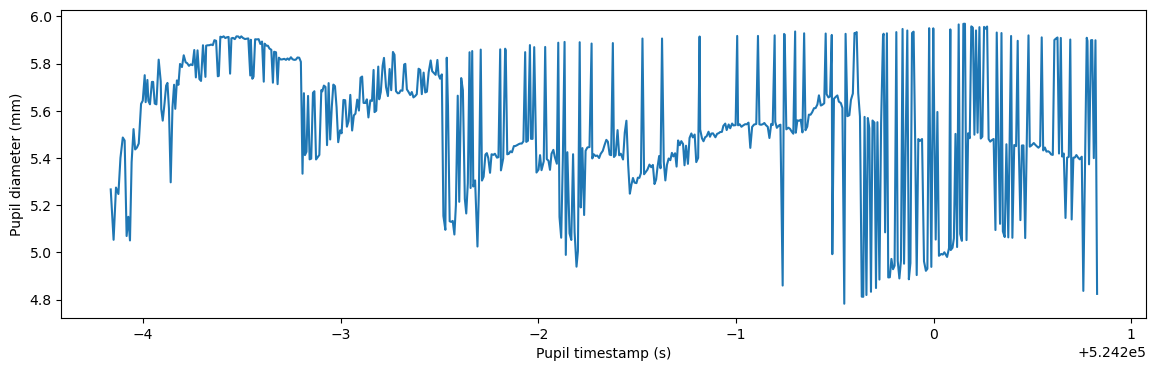

In [19]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')